<a href="https://colab.research.google.com/github/AilingLiu/Training-Linear-Models-With-Toy-Data/blob/master/Training_linear_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This project follows the tutorial of O'Reilly latest ML book **Hands-on Machine Learning with Scikit-Learn, Keras and Tensorflow**

# Set u

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl 
%matplotlib inline

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import os
PROJECT_DIR_ROOT = '.'
PROJECT_ID = 'TRAINING_MODELS'
IMAGE_PATH = os.path.join(PROJECT_DIR_ROOT, PROJECT_ID, 'IMAGES')
if not os.path.isdir(IMAGE_PATH):
  os.makedirs(IMAGE_PATH)

def save_fig(name, path=IMAGE_PATH, dpi=300, format='png', tight_layout=True):
  file_path=os.path.join(path, name + '.' + format)
  if not os.path.isdir(path):
    os.makedirs(path)
  if tight_layout:
    plt.tight_layout()
  plt.savefig(file_path, dip=dpi, format=format)

# Linear Regression

We will first use closed-form equation to get the best parameter that minimie MSE. Then we will use iterative optimization process by Gradient Descent to get the best parameters.

Normal Equation Formula


$\hat\theta = (X^TX)^{-1}X^Ty$

(0, 14)

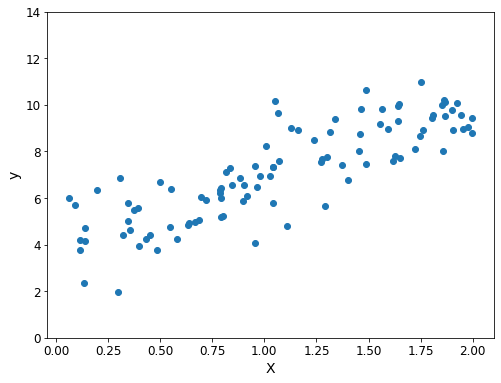

In [0]:
# randomly create datasets

X = 2*np.random.rand(100, 1)
y = 4 + 3*X + np.random.randn(100, 1)

plt.figure(figsize=(8, 6))
plt.scatter(X, y)
plt.xlabel('X')
plt.ylabel('y')
plt.ylim(0, 14)

In [0]:
# add xo=1
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [0]:
theta_best

array([[3.85598773],
       [3.0435274 ]])

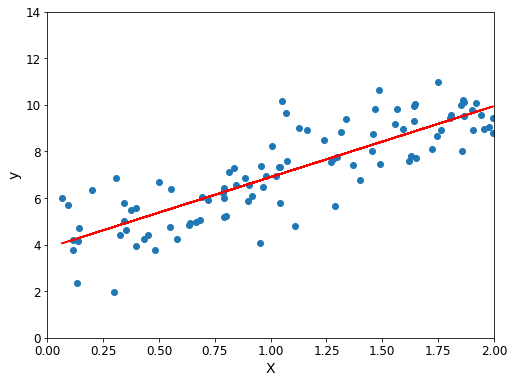

In [0]:
y_preds = X_b.dot(theta_best)

plt.figure(figsize=(8, 6))
plt.scatter(X, y)
plt.xlabel('X')
plt.ylabel('y')
plt.ylim(0, 14)
plt.xlim(0, 2)
plt.plot(X_b[:, 1], y_preds, 'r-')

In [0]:
# we can also use sklearn to get the best theta
from sklearn.linear_model import LinearRegression

lin_rg = LinearRegression()
lin_rg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
lin_rg.intercept_, lin_rg.coef_

(array([3.85598773]), array([[3.0435274]]))

# Gradient Descent

We will use bath gradient decent, mini-batch gradient descent, and stochastic gradient descent to iteratively find the best thetas.

partial derivatives of the cost function (mse)

$
\frac{\partial}{\partial\theta_{j}}=\frac{2}{m}*\sum^{m}_{i=1}(\theta^{T}x^{i}-y^{i})x^{i}_{j}
$

$
\theta := \theta - \eta\frac{\partial}{\partial\theta_{j}}
$

In [0]:
iterations = 1000
eta= 0.1 #learning rate
m=100

# randomly initialized theta
theta = np.random.randn(2, 1)

for iteration in range(iterations):
  gradients = 2/m * (X_b.T.dot(X_b.dot(theta)-y))
  theta = theta - eta*gradients

In [0]:
theta

array([[3.85598773],
       [3.0435274 ]])

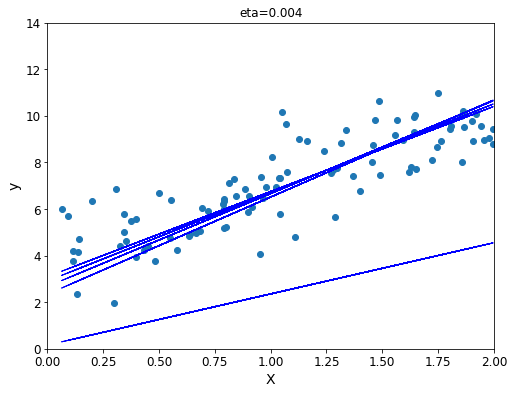

In [0]:
iterations = 1000
eta= 0.004 #learning rate
m=100

# randomly initialized theta
theta = np.random.randn(2, 1)

plt.figure(figsize=(8, 6))
plt.scatter(X, y)
plt.xlabel('X')
plt.ylabel('y')
plt.ylim(0, 14)
plt.xlim(0, 2)
plt.title('eta=0.004')

for iteration in range(iterations):
  gradients = 2/m * (X_b.T.dot(X_b.dot(theta)-y))
  theta = theta - eta*gradients
  if iteration % 200 == 0:
    preds=X_b.dot(theta)
    plt.plot(X_b[:, 1], preds, 'b-', linewidth=1) 

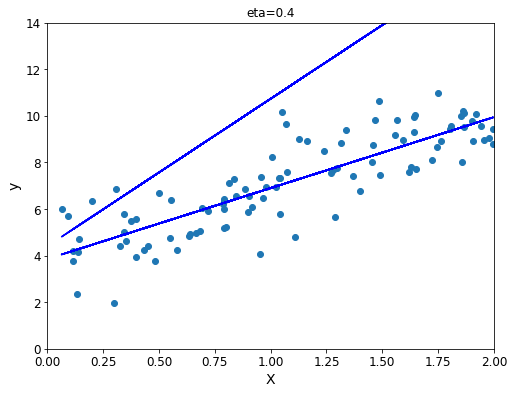

In [0]:
iterations = 1000
eta= 0.4 #learning rate
m=100

# randomly initialized theta
theta = np.random.randn(2, 1)

plt.figure(figsize=(8, 6))
plt.scatter(X, y)
plt.xlabel('X')
plt.ylabel('y')
plt.ylim(0, 14)
plt.xlim(0, 2)
plt.title('eta=0.4')

for iteration in range(iterations):
  gradients = 2/m * (X_b.T.dot(X_b.dot(theta)-y))
  theta = theta - eta*gradients
  if iteration % 200 == 0:
    preds=X_b.dot(theta)
    plt.plot(X_b[:, 1], preds, 'b-') 

when learning rate is too large, the algoritm diverges, jumping all over the places and actually getting further and further away from the solution every step.

# Stochastic Gradient Descent

Stochastic Gradient Descent use a random instance from the training data so as to speed up the computation from large dataset and jump out of local minima (thanks to randomness). To lead the algorithm settle at the minimum, we can reuce the learning rate gradually. 

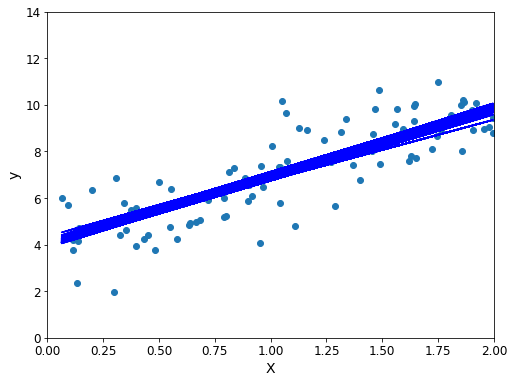

In [0]:
epochs=50
t0, t1 = 5, 50
m = 100

def learning_schedule(t):
  return t0/(t+t1)

theta = np.random.randn(2,1)

plt.figure(figsize=(8, 6))
plt.scatter(X, y)
plt.xlabel('X')
plt.ylabel('y')
plt.ylim(0, 14)
plt.xlim(0, 2)

for epoch in range(epochs):
  for i in range(m):
    rand_index = np.random.randint(m)
    xi = X_b[rand_index:rand_index+1]
    yi = y[rand_index:rand_index+1]
    gradient=2*xi.T.dot(xi.dot(theta)-yi)
    eta = learning_schedule(epoch*m+i)
    theta = theta - eta*gradient
  preds = X_b.dot(theta)
  plt.plot(X_b[:, 1], preds, 'b-')

In [0]:
theta

array([[3.86243882],
       [2.95984946]])

In [0]:
# we can use sklearn libraries to do so
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(tol=0.003, penalty=None, eta0=0.1, random_state=42) # the default parameters look quite good to me, like the initial eta is 0.01; it has penalty param also.
sgd_reg.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=42,
             shuffle=True, tol=0.003, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [0]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.90826791]), array([3.13387262]))

# Polynomial Regress

In [0]:
# set a random non-linear dataset
X = 6* np.random.rand(100, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(100, 1)

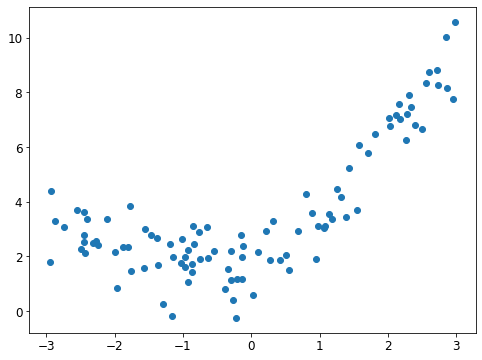

In [0]:
plt.figure(figsize=(8, 6))
plt.scatter(X, y)
#plt.xlim(-1, 5)

In [0]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
lin_reg.intercept_, lin_reg.coef_

(array([2.05716702]), array([[0.96738833, 0.52939719]]))

<Figure size 432x288 with 0 Axes>

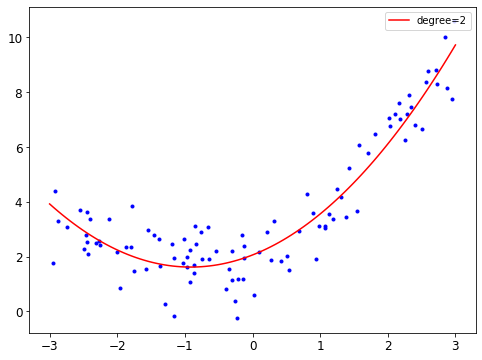

In [0]:
# it's quite close to our original parameters
plt.clf()
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly=poly.transform(X_new)

preds = lin_reg.predict(X_new_poly)

plt.figure(figsize=(8, 6))
plt.plot(X, y, 'b.')
plt.plot(X_new, preds, 'r-', label='degree=2')
plt.legend(loc='upper right')
#plt.xlim(-1, 5)

[-3, 3, 0, 10]

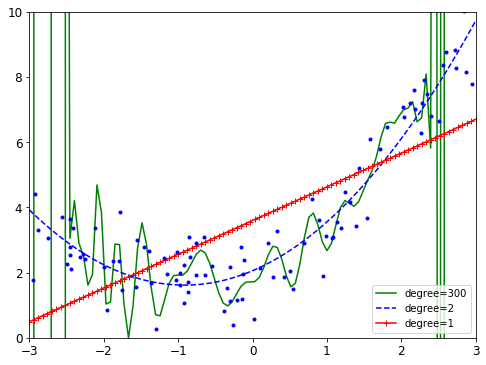

In [0]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

plt.figure(figsize=(8, 6))
for style, degree in (('g-', 300), ('b--', 2), ('r-+', 1)):
  poly_features = PolynomialFeatures(degree=degree, include_bias=False)
  poly_regression = Pipeline([
                              ('poly_feature', poly_features),
                              ('scaler', StandardScaler()),
                              ('lin_regression', LinearRegression())
  ])
  poly_regression.fit(X, y)
  preds = poly_regression.predict(X_new)
  plt.plot(X_new, preds, style, label='degree='+str(degree))
  plt.legend(loc='lower right')


plt.plot(X, y, 'b.')
plt.axis([-3, 3, 0, 10])

# Use learning curve to spot underfitting and overfitting

In [0]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curve(model, X, y):
  X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
  m = len(X_train)
  train_rmse=[]
  val_rmse=[]

  for i in range(1, m):
    xtrain=X_train[:i]
    ytrain=y_train[:i]
    model.fit(xtrain, ytrain)
    ytrain_preds = model.predict(xtrain)
    ytest_preds = model.predict(X_val)
    train_rmse.append(np.sqrt(mean_squared_error(ytrain, ytrain_preds)))
    val_rmse.append(np.sqrt(mean_squared_error(y_val, ytest_preds)))
  plt.plot(train_rmse, 'r-+', linewidth=2, label='train')
  plt.plot(val_rmse, 'b-', linewidth=2.2, label='val')
  plt.xlabel('Training Set Size')
  plt.ylabel('RMSE')
  plt.legend(loc='upper right')


[0, 80, 0, 3]

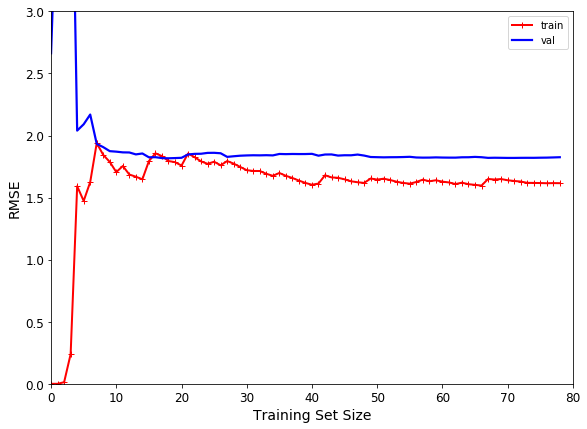

In [0]:
lin_reg = LinearRegression()
plt.figure(figsize=(8, 6))
plot_learning_curve(lin_reg, X, y)
save_fig("underfitting_learning_curves_plot")
plt.axis([0, 80, 0, 3])

This shows underfitting. The increase of training data does not help to reduce the errors from both train and val sets. Moreover, the rmse is not at its best.

[0, 80, 0, 2]

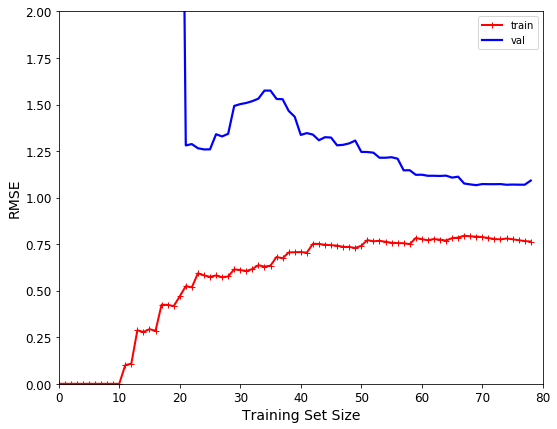

In [0]:
 poly_regression = Pipeline([
                              ('poly_feature', PolynomialFeatures(degree=10, include_bias=False)),
                              ('scaler', StandardScaler()),
                              ('lin_regression', LinearRegression())
  ])

plt.figure(figsize=(8, 6))

plot_learning_curve(poly_regression, X, y)
save_fig("overfitting_learning_curves_plot")
plt.axis([0, 80, 0, 2])

The training error is much lower than validation error. It's a sign of overfitting. We should continue to put more data to reduce the train and validation gap.

# Regularization

Three methods to deal to overfitting: Lasso, Ridge, and Elastic Net. Lasso will give 0 weight to useless features, equivalent to feature selection, while Ridge will give very low weight to the insignificant features. Elastic Net is balanced of both. The trade-off between bias and variance is controled by alpha in all of these three methods.

In [0]:
# Ridge
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1, random_state=42, solver='cholesky') #the solver used the closed form equation with regularization constraints

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
ridge.fit(X_train, y_train)
preds = ridge.predict(X_val)
mse = mean_squared_error(y_val, preds)
print('rmse in Ridge (alpha:1): ', np.sqrt(mse))

rmse in Ridge (alpha:1):  1.825723091966579


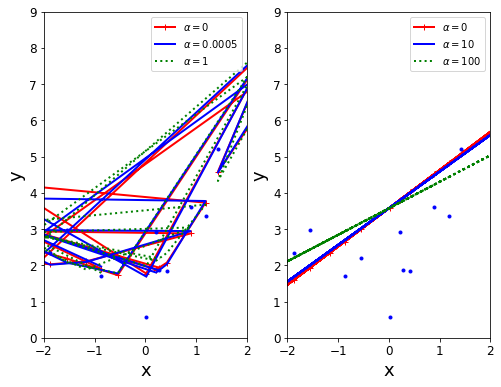

In [0]:
def plot_model(model_class, polynomial, alphas, styles, X, y, **model_kargs):
  X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=42, test_size=0.2)
  for alpha, style in zip(alphas, styles):
    model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
    if polynomial==True:
      model=Pipeline([
                      ('poly_feature', PolynomialFeatures(degree=10, include_bias=False)),
                      ('scaler', StandardScaler()),
                      ('reg_model', model)
      ])      
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    plt.plot(X_val, y_pred, style, label=r'$\alpha= {}$'.format(alpha), linewidth=2)
  plt.plot(X_val, y_val, 'b.')
  plt.legend(loc='upper right')
  plt.axis([-2, 2, 0, 9])
  plt.ylabel('y', fontsize=18)
  plt.xlabel('x', fontsize=18)  

plt.figure(figsize=(8, 6))

plt.subplot(121)
plot_model(Ridge, polynomial=True, alphas=[0, 0.0005, 1], styles=['r-+', 'b-', 'g:'], X=X, y=y) #something wrong here
plt.subplot(122)
plot_model(Ridge, polynomial=False, alphas=[0, 10, 100], styles=['r-+', 'b-', 'g:'], X=X, y=y)

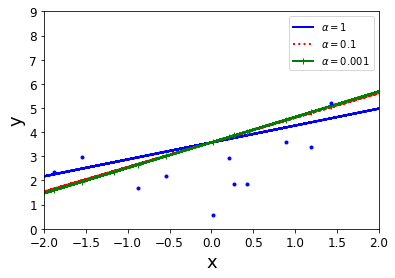

In [0]:
# Lasso
from sklearn.linear_model import Lasso
plot_model(Lasso, polynomial=False, alphas=[1, 0.1, 0.001], styles=['b-', 'r:', 'g-+'], X=X, y=y)

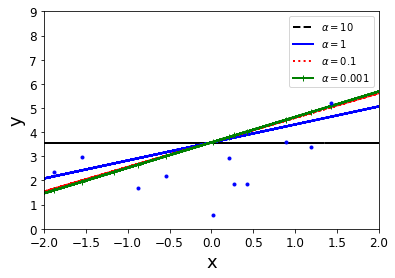

In [0]:
# elastic net
from sklearn.linear_model import ElasticNet
plot_model(ElasticNet, polynomial=False, alphas=[10, 1, 0.1, 0.001], styles=['k--','b-', 'r:', 'g-+'], X=X, y=y, l1_ratio=0.5)

# Logistic Regression

Used for classification problem.

In [2]:
from sklearn.datasets import load_iris

iris = load_iris()
iris.keys()


dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [3]:
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [0]:
import numpy as np
X = iris['data'][:, 3:]
y = (iris['target']== 2).astype(np.int)

In [16]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

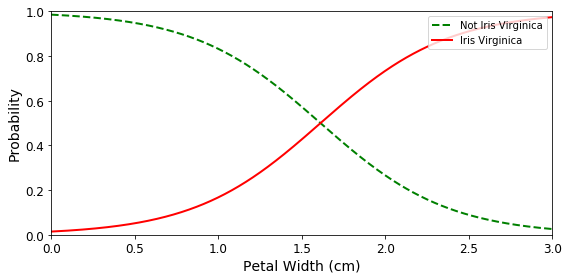

In [25]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_prob = log_reg.predict_proba(X_new)

plt.figure(figsize=(8, 4))
plt.plot(X_new, y_prob[:, 0], 'g--', label='Not Iris Virginica', linewidth=2)
plt.plot(X_new, y_prob[:, 1], 'r-', label='Iris Virginica', linewidth=2)
plt.legend(loc='upper right', fontsize=10)
plt.xlabel('Petal Width (cm)')
plt.ylabel('Probability')
plt.axis([0, 3, 0, 1]);
save_fig('iris_virginica_decision_threshold')

In [27]:
decision_boundary = X_new[y_prob[:, 1] >= 0.5][0]
decision_boundary

array([1.61561562])

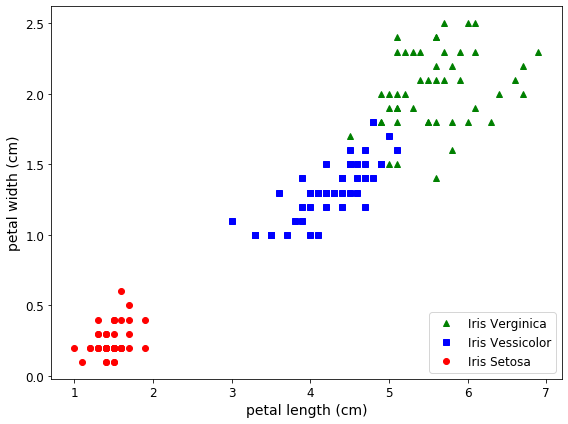

In [46]:
# multiclass plot
X = iris['data'][:, (2, 3)]
y = iris['target']

plt.figure(figsize=(8, 6))
plt.plot(X[y==2, 0], X[y==2, 1], 'g^', label='Iris Verginica')
plt.plot(X[y==1, 0], X[y==1, 1], 'bs', label='Iris Vessicolor')
plt.plot(X[y==0, 0], X[y==0, 1], 'ro', label='Iris Setosa')
plt.xlabel('petal length (cm)', fontsize=14)
plt.ylabel('petal width (cm)', fontsize=14)
plt.legend(loc='lower right', fontsize=12)
save_fig('multiple_class_iris')

In [44]:
# multiple class prediction using softmax probability
softmax_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=100, random_state=42)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
softmax_reg.fit(X_train, y_train)
y_preds = softmax_reg.predict(X_test)

confusion_matrix(y_test, y_preds)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

In [47]:
softmax_reg.predict([[5,2]])

array([2])